Extract a,b,z files from csvs.

In [19]:
import numpy as np
import glob
import csv
import os

num_checkpoints = 42    # 2*i for i in range (2,100,2)
bs = 364                # samples in eth test set (LOO)
nz = 2                  # latent dim
rep = 1

this_run_info = '0504_0102_take1'
latents_root_dir = './test/z_data/' + this_run_info
# 0419_010{5/3/6/1}_take{1/2/3}
# In total should get 3*4 = 12 results.

# try:
#     os.makedirs(latents_root_dir+'/a_post')
#     os.makedirs(latents_root_dir+'/b_post')
#     os.makedirs(latents_root_dir+'/z_post')
#     os.makedirs(latents_root_dir+'/a_prior')
#     os.makedirs(latents_root_dir+'/b_prior')
#     os.makedirs(latents_root_dir+'/z_prior')
# except FileExistsError:
#     pass

a_prior = np.zeros((num_checkpoints//2, bs * rep, nz))
b_prior = np.zeros((num_checkpoints//2, bs * rep, nz))
z_prior = np.zeros((num_checkpoints//2, bs * rep, nz))

a_post = np.zeros((num_checkpoints//2, bs * rep, nz))
b_post = np.zeros((num_checkpoints//2, bs * rep, nz))
z_post = np.zeros((num_checkpoints//2, bs * rep, nz))

# a_prior_files = glob.glob(latents_root_dir + '/a_prior/*.csv')

# print(a_prior_files)
# for i in range(2,num_checkpoints*2+1,2):
for i in range(2,num_checkpoints+1,2):
    # print(i)
    checkpoint_num = str(i)
    
    a_prior_csv_file = latents_root_dir + '/a_prior/' + checkpoint_num + '.csv'
    b_prior_csv_file = latents_root_dir + '/b_prior/' + checkpoint_num + '.csv'
    z_prior_csv_file = latents_root_dir + '/z_prior/' + checkpoint_num + '.csv'
    
    a_post_csv_file = latents_root_dir + '/a_post/' + checkpoint_num + '.csv'
    b_post_csv_file = latents_root_dir + '/b_post/' + checkpoint_num + '.csv'
    z_post_csv_file = latents_root_dir + '/z_post/' + checkpoint_num + '.csv'
    
    a_post_data = np.genfromtxt(a_post_csv_file, delimiter=',')
    a_post[i//2 - 1] = a_post_data[0:bs,:]
    b_post_data = np.genfromtxt(b_post_csv_file, delimiter=',')
    b_post[i//2 - 1] = b_post_data[0:bs,:]
    z_post_data = np.genfromtxt(z_post_csv_file, delimiter=',')
    z_post[i//2 - 1] = z_post_data[0:bs,:]

    # with open(z_prior_csv_file, 'r') as file:
    #     reader = csv.reader(file)
    #     lines = list(reader)

    #     for j in range(0, len(lines), 20):
    #         # Extract data from a_prior_csv_file
    #         data = lines[j]
    #         # Change values in z_prior
    #         z_prior[i//2 - 1, j//20, :] = data

    # with open(a_prior_csv_file, 'r') as file:
    #     reader = csv.reader(file)
    #     lines = list(reader)

    #     for j in range(0, len(lines), 20):
    #         # Extract data from a_prior_csv_file
    #         data = lines[j]
    #         # Change values in z_prior
    #         a_prior[i//2 - 1, j//20, :] = data

    # with open(b_prior_csv_file, 'r') as file:
    #     reader = csv.reader(file)
    #     lines = list(reader)

    #     for j in range(0, len(lines), 20):
    #         # Extract data from a_prior_csv_file
    #         data = lines[j]
    #         # Change values in z_prior
    #         b_prior[i//2 - 1, j//20, :] = data
        

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]


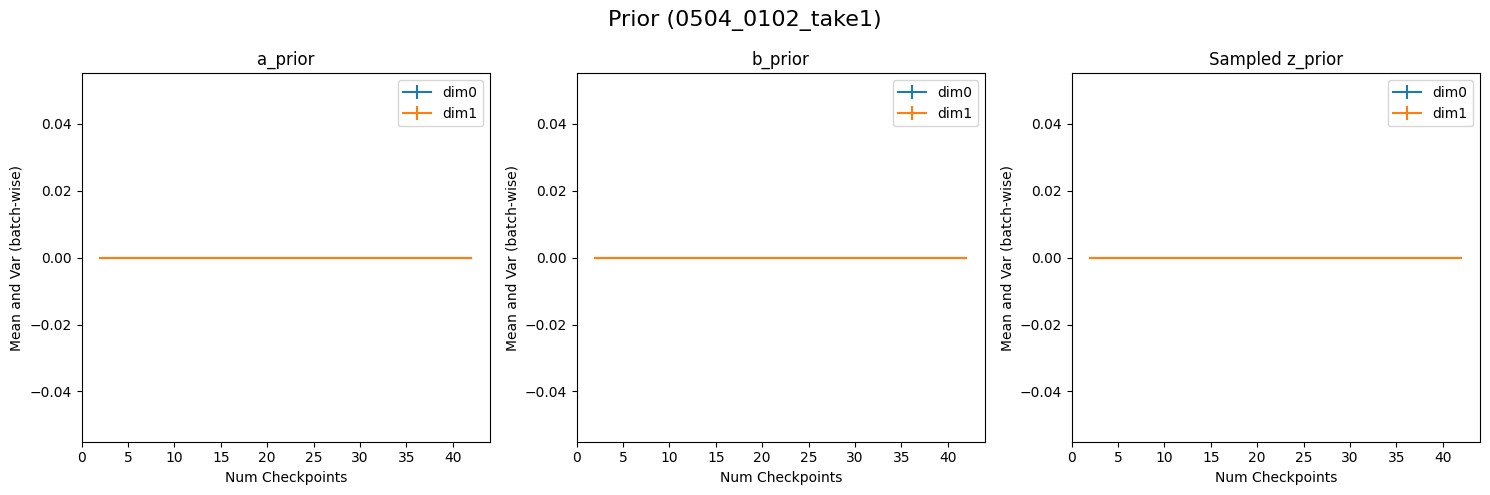

In [20]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

mean_a_prior = np.mean(a_prior, axis=1)
var_a_prior = np.var(a_prior, axis=1)

mean_b_prior = np.mean(b_prior, axis=1)
var_b_prior = np.var(b_prior, axis=1)

mean_z_prior = np.mean(z_prior, axis=1)
var_z_prior = np.var(z_prior, axis=1)

x_arr = np.array(range(2, num_checkpoints+1, 2))
print(x_arr)

axs[0].errorbar(x_arr, mean_a_prior[:, 0], yerr=np.sqrt(var_a_prior[:, 0]), label='dim0')
axs[0].errorbar(x_arr, mean_a_prior[:, 1], yerr=np.sqrt(var_a_prior[:, 1]), label='dim1')
axs[0].set_xlabel('Num Checkpoints')
axs[0].set_ylabel('Mean and Var (batch-wise)')
axs[0].set_title('a_prior')
axs[0].legend()

axs[1].errorbar(x_arr, mean_b_prior[:, 0], yerr=np.sqrt(var_b_prior[:, 0]), label='dim0')
axs[1].errorbar(x_arr, mean_b_prior[:, 1], yerr=np.sqrt(var_b_prior[:, 1]), label='dim1')
axs[1].set_xlabel('Num Checkpoints')
axs[1].set_ylabel('Mean and Var (batch-wise)')
axs[1].set_title('b_prior')
axs[1].legend()

axs[2].errorbar(x_arr, mean_z_prior[:, 0], yerr=np.sqrt(var_z_prior[:, 0]), label='dim0')
axs[2].errorbar(x_arr, mean_z_prior[:, 1], yerr=np.sqrt(var_z_prior[:, 1]), label='dim1')
axs[2].set_xlabel('Num Checkpoints')
axs[2].set_ylabel('Mean and Var (batch-wise)')
axs[2].set_title('Sampled z_prior')
axs[2].legend()

fig.suptitle('Prior ({})'.format(this_run_info), fontsize=16)  # Add a unified title to the subplots
plt.tight_layout()
plt.show()


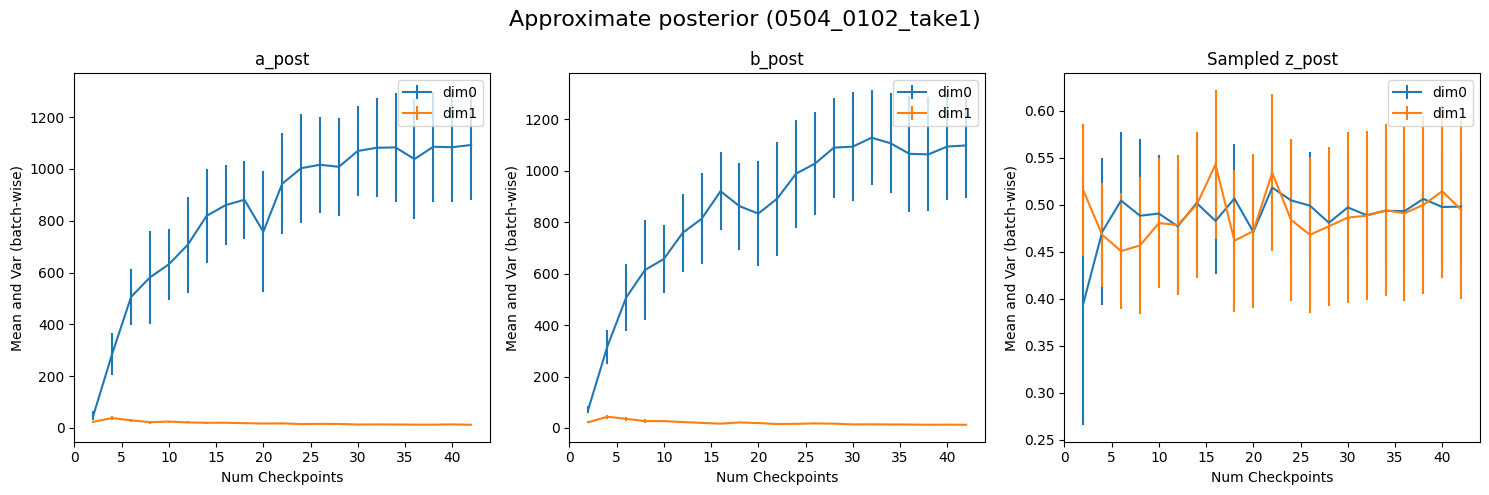

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

mean_a_post = np.mean(a_post, axis=1)
var_a_post = np.var(a_post, axis=1)

mean_b_post = np.mean(b_post, axis=1)
var_b_post = np.var(b_post, axis=1)

mean_z_post = np.mean(z_post, axis=1)
var_z_post = np.var(z_post, axis=1)

# print(mean_a_post[:,0].shape)

axs[0].errorbar(x_arr, mean_a_post[:, 0], yerr=np.sqrt(var_a_post[:, 0]), label='dim0')
axs[0].errorbar(x_arr, mean_a_post[:, 1], yerr=np.sqrt(var_a_post[:, 1]), label='dim1')
# axs[0].set_xticks(x_arr)  # Set x-axis ticks with step size of 2
axs[0].set_xlabel('Num Checkpoints')
axs[0].set_ylabel('Mean and Var (batch-wise)')
axs[0].set_title('a_post')
axs[0].legend()

axs[1].errorbar(x_arr, mean_b_post[:, 0], yerr=np.sqrt(var_b_post[:, 0]), label='dim0')
axs[1].errorbar(x_arr, mean_b_post[:, 1], yerr=np.sqrt(var_b_post[:, 1]), label='dim1')
# axs[1].set_xticks(x_arr)  # Set x-axis ticks with step size of 2
axs[1].set_xlabel('Num Checkpoints')
axs[1].set_ylabel('Mean and Var (batch-wise)')
axs[1].set_title('b_post')
axs[1].legend()

axs[2].errorbar(x_arr, mean_z_post[:, 0], yerr=np.sqrt(var_z_post[:, 0]), label='dim0')
axs[2].errorbar(x_arr, mean_z_post[:, 1], yerr=np.sqrt(var_z_post[:, 1]), label='dim1')
# axs[2].set_xticks(x_arr)  # Set x-axis ticks with step size of 2
axs[2].set_xlabel('Num Checkpoints')
axs[2].set_ylabel('Mean and Var (batch-wise)')
axs[2].set_title('Sampled z_post')
axs[2].legend()

fig.suptitle('Approximate posterior ({})'.format(this_run_info), fontsize=16)  # Add a unified title to the subplots
plt.tight_layout()
plt.show()


Evaluate individual datapoints' distributions. Visualize gif.

In [22]:
dp_idx = 300  # for eth, choose from 0-363

from scipy.stats import beta
from matplotlib.animation import FuncAnimation
import glob

# a_post shape: [checkpoint, bs, nz]
dp_a_post = a_post[:,dp_idx,:]
dp_a_prior = a_prior[:, dp_idx,:]
dp_b_post = b_post[:,dp_idx,:]
dp_b_prior = b_prior[:, dp_idx,:]

print(dp_b_post.shape)

(21, 2)


MovieWriter imagemagick unavailable; using Pillow instead.


MovieWriter imagemagick unavailable; using Pillow instead.


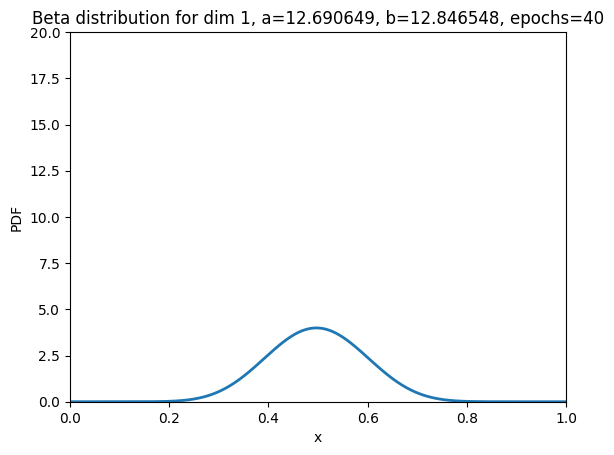

In [23]:
fig,ax = plt.subplots()
line, =  ax.plot([],[],lw=2)

joint_params_dim0 = zip(dp_a_post[:,0], dp_b_post[:,0])
joint_params_dim1 = zip(dp_a_post[:,1], dp_b_post[:,1])
eps0,eps1 = 0,0

def update_dim0(frame):
    global eps0
    a,b = next(joint_params_dim0)
    x = np.linspace(0,1,1000)
    y = beta.pdf(x,a,b)
    ax.clear()
    ax.plot(x,y,lw=2)
    ax.set_title(f'Beta distribution for dim 0, a={a}, b={b}, epochs={eps0}')
    eps0 += 2
    ax.set_xlim(0,1)
    ax.set_ylim(0,10)
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')
    return line, 

def update_dim1(frame):
    global eps1
    a,b = next(joint_params_dim1)
    x = np.linspace(0,1,1000)
    y = beta.pdf(x,a,b)
    ax.clear()
    ax.plot(x,y,lw=2)
    ax.set_title(f'Beta distribution for dim 1, a={a}, b={b}, epochs={eps1}')
    eps1 += 2
    ax.set_xlim(0,1)
    ax.set_ylim(0,20)
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')
    return line, 

anim_dim0 = FuncAnimation(fig, update_dim0, frames=num_checkpoints//2-1, interval=200)
anim_dim0.save(f'./plots/{this_run_info}/post_dp{dp_idx}_dim0.gif', writer='imagemagick')

anim_dim1 = FuncAnimation(fig, update_dim1, frames=num_checkpoints//2-1, interval=200)
anim_dim1.save(f'./plots/{this_run_info}/post_dp{dp_idx}_dim1.gif', writer='imagemagick')